In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\hari\Desktop\SIDDHARTH\Kaggle_comp\Car_Price_Pred\car data.csv')

In [15]:
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [6]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [7]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [10]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [16]:
df['Car_Name'].value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
amaze                         7
jazz                          7
Royal Enfield Classic 350     7
sx4                           6
ertiga                        6
eon                           6
i10                           5
alto k10                      5
swift                         5
dzire                         4
ritz                          4
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
wagon r                       4
etios liva                    4
Bajaj Avenger 220             3
creta                         3
Yamaha FZ S V 2.0             3
Honda CB Hornet 160R          3
etios cross                   3
xcent                         3
etios g                       3
Bajaj Pu

In [17]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [18]:
#Check the missing values

In [22]:
df.isnull().sum() #No missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [24]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [28]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [32]:
#Removing car name as there are too many diff car names.

final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [33]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
final_dataset['Current_Year'] =2020

In [35]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [36]:
final_dataset['No_Of_Years'] = final_dataset['Current_Year'] - final_dataset['Year']

In [37]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [38]:
final_dataset.drop(columns=['Year','Current_Year'],axis=1,inplace=True)

In [39]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [40]:
#categorical features should be converted now..

In [41]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [42]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [43]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


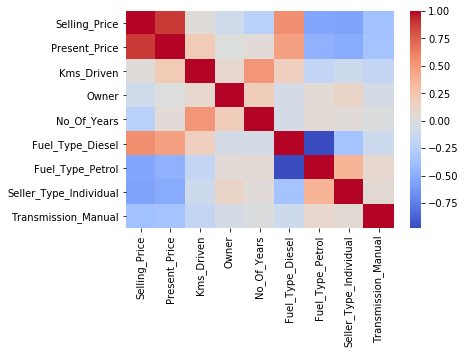

In [46]:
sns.heatmap(final_dataset.corr(),cmap='coolwarm')

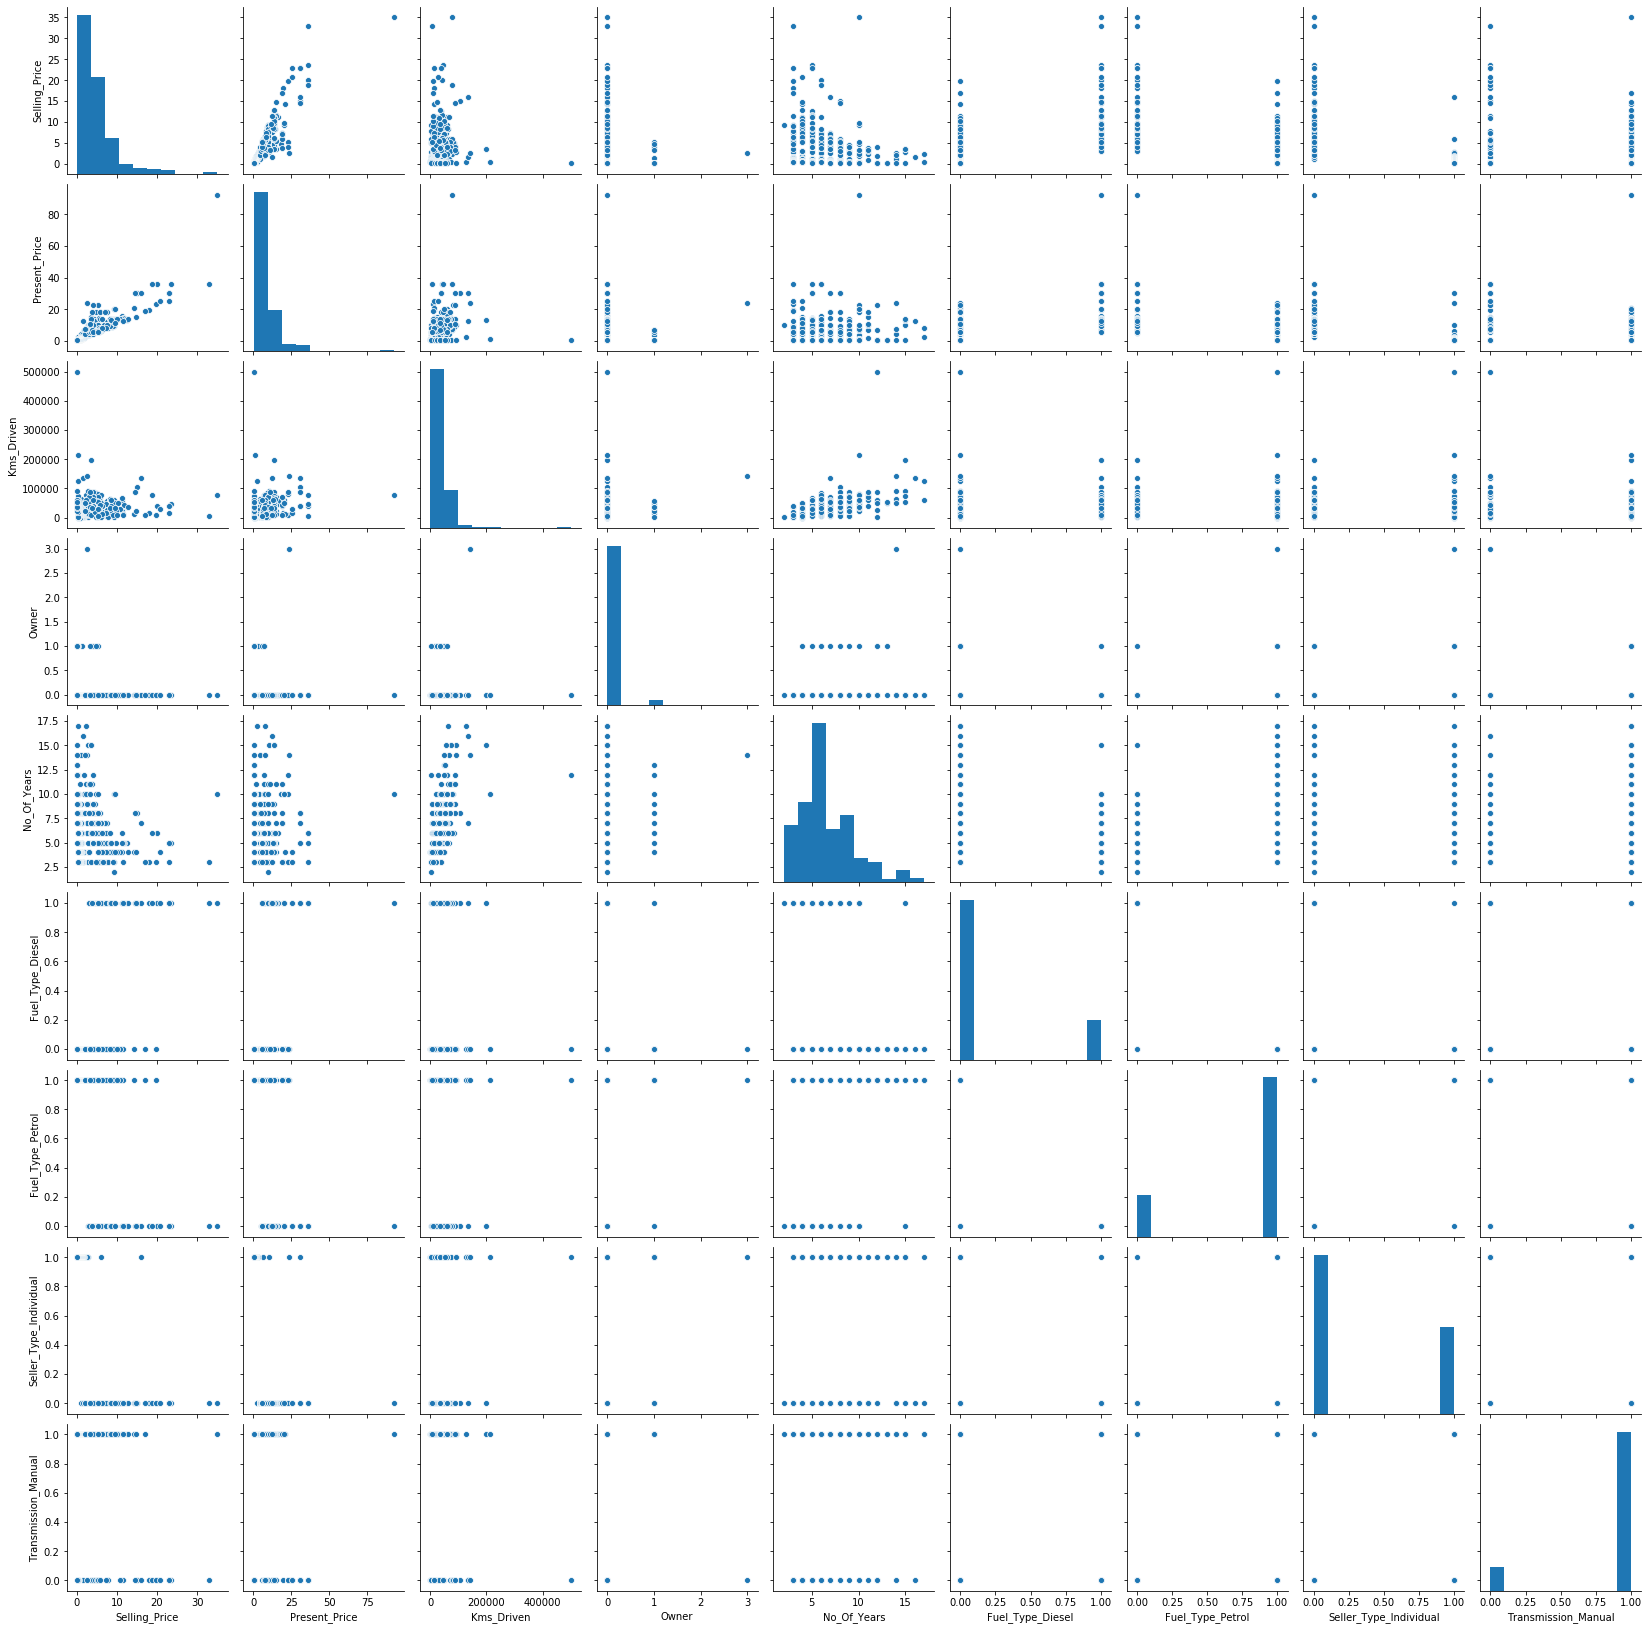

In [47]:
sns.pairplot(final_dataset)

In [50]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

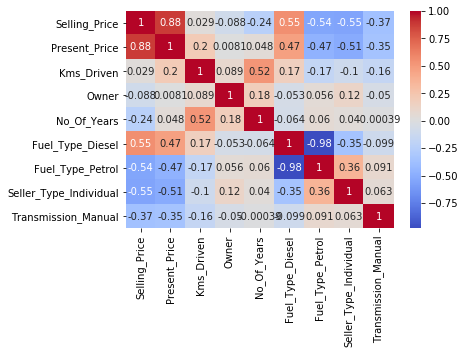

In [52]:
g = sns.heatmap(final_dataset[top_corr_features].corr(),cmap='coolwarm',annot=True)

In [53]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [55]:
#features
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [56]:
X.head()

,Present_Price,Kms_Driven,Owner,No_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [57]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [58]:
### Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\hari\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [59]:
print(model.feature_importances_)

[3.90797036e-01 5.14954683e-02 1.41590673e-04 6.61870854e-02
 2.44726341e-01 1.41265575e-02 7.66233090e-02 1.55902611e-01]


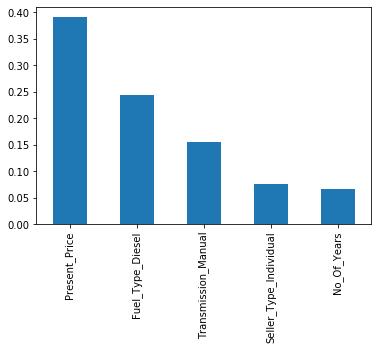

In [60]:
#feature importance graph:
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [63]:
X_train.shape

(240, 8)

In [64]:
y_train.shape

(240,)

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [67]:
#Hyperparameters
n_estimators =[int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features =['auto','sqrt']
max_depth =[int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split =[2,5,10,15,100]
min_samples_leaf =[1,2,5,100]

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
#random grid
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_split}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [2, 5, 10, 15, 100]}


In [71]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [72]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.8s
[CV] n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=700, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=30, total=   0.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=15, max_features=sqrt, max_depth=30, total=   0.4s
[CV] n_estimators=400, min_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   48.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [73]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=900,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [75]:
rf_random.best_score_

-3.58913888269021

In [76]:
#prediction time
predictions = rf_random.predict(X_test)

In [77]:
predictions

array([ 7.47641759,  3.77510212, 10.8802302 ,  6.95954347,  4.49511423,
        2.11298113,  5.62554298,  1.33355215,  1.06171457,  1.26126841,
        4.7885985 ,  8.03139214,  2.93750443,  3.40949256,  5.40203096,
       19.31911552,  0.42394085,  0.45855577, 17.58438079,  5.70412908,
        0.6058043 ,  2.6456682 ,  0.5714285 ,  0.38247287,  7.3622509 ,
        1.12099611, 12.08603883,  6.69130999,  1.07804683,  1.00654671,
        6.38470468,  5.9125032 ,  0.35825167,  0.36773578,  0.64658615,
        2.55150843,  7.42047807,  7.42468973,  3.59244633,  0.44046158,
        4.3776631 , 10.03990538,  1.06171457,  5.38718406,  1.68586189,
       11.89308066,  4.60814267,  0.69455559, 10.84079235,  0.33478203,
       10.19974202,  0.69097635,  0.75925283,  5.32069482,  3.28431723,
        5.87946743,  1.1829146 ,  4.92398964,  9.31598841,  3.73115329,
        2.82822025])

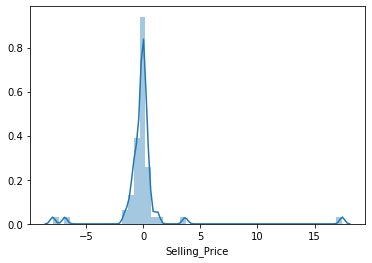

In [78]:
sns.distplot(y_test-predictions) #the difference between ytest and predictions should be minimal..And the normal distribution proves that.

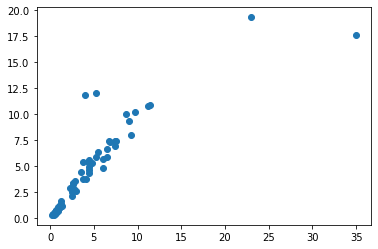

In [80]:
plt.scatter(x=y_test,y=predictions)

In [81]:
#pickle the file.
import pickle
file =open('RFREGmodel_CarPred.pkl','wb')
#dump
pickle.dump(rf_random, file)